In [10]:
import numpy as np
from qiskit import BasicAer
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance

from qiskit.opflow import X, Z, I
BeH2_op = (-0.143021 * Z ^ I ^ I ^ I ^ I ^ I) + \
      (0.104962 * Z ^ Z ^ I ^ I ^ I ^ I) + \
      (0.038195 * I ^ Z ^ Z ^ I ^ I ^ I) + \
      (-0.325651 * I ^ I ^ Z ^ I ^ I ^ I) + \
      (-0.143021 * I ^ I ^ I ^ Z ^ I ^ I) + \
      (0.104962 * I ^ I ^ I ^ Z ^ Z ^ I) + \
      (0.038195 * I ^ I ^ I ^ I ^ Z ^ Z) + \
      (-0.325651 * I ^ I ^ I ^ I ^ I ^ Z) + \
      (0.172191 * I ^ Z ^ I ^ I ^ I ^ I) + \
      (0.174763 * Z ^ Z ^ Z ^ I ^ I ^ I) + \
      (0.136055 * Z ^ I ^ Z ^ I ^ I ^ I) + \
      (0.116134 * Z ^ I ^ I ^ Z ^ I ^ I) + \
      (0.094064 * Z ^ I ^ I ^ Z ^ Z ^ I) + \
      (0.099152 * Z ^ I ^ I ^ I ^ Z ^ Z) + \
      (0.123367 * Z ^ I ^ I ^ I ^ I ^ Z) + \
      (0.094064 * Z ^ Z ^ I ^ Z ^ I ^ I) + \
      (0.098003 * Z ^ Z ^ I ^ Z ^ Z ^ I) + \
      (0.102525 * Z ^ Z ^ I ^ I ^ Z ^ Z) + \
      (0.097795 * Z ^ Z ^ I ^ I ^ I ^ Z) + \
      (0.099152 * I ^ Z ^ Z ^ Z ^ I ^ I) + \
      (0.102525 * I ^ Z ^ Z ^ Z ^ Z ^ I) + \
      (0.112045 * I ^ Z ^ Z ^ I ^ Z ^ Z) + \
      (0.105708 * I ^ Z ^ Z ^ I ^ I ^ Z) + \
      (0.123367 * I ^ I ^ Z ^ Z ^ I ^ I) + \
      (0.097795 * I ^ I ^ Z ^ Z ^ Z ^ I) + \
      (0.105708 * I ^ I ^ Z ^ I ^ Z ^ Z) + \
      (0.133557 * I ^ I ^ Z ^ I ^ I ^ Z) + \
      (0.172191 * I ^ I ^ I ^ I ^ Z ^ I) + \
      (0.174763 * I ^ I ^ I ^ Z ^ Z ^ Z) + \
      (0.136055 * I ^ I ^ I ^ Z ^ I ^ Z) + \
      (0.059110 * X ^ Z ^ I ^ I ^ I ^ I) + \
      (-0.059110 * X ^ I ^ I ^ I ^ I ^ I) + \
      (0.161019 * I ^ Z ^ X ^ I ^ I ^ I) + \
      (-0.161019 * I ^ I ^ X ^ I ^ I ^ I) + \
      (0.059110 * I ^ I ^ I ^ X ^ Z ^ I) + \
      (-0.059110 * I ^ I ^ I ^ X ^ I ^ I) + \
      (0.161019 * I ^ I ^ I ^ I ^ Z ^ X) + \
      (-0.161019 * I ^ I ^ I ^ I ^ I ^ X) + \
      (-0.038098 * X ^ I ^ X ^ I ^ I ^ I) + \
      (-0.003300 * X ^ Z ^ X ^ I ^ I ^ I) + \
      (0.013745 * X ^ Z ^ I ^ X ^ Z ^ I) + \
      (-0.013745 * X ^ Z ^ I ^ X ^ I ^ I) + \
      (-0.013745 * X ^ I ^ I ^ X ^ Z ^ I) + \
      (0.013745 * X ^ I ^ I ^ X ^ I ^ I) + \
      (0.011986 * X ^ Z ^ I ^ I ^ Z ^ X) + \
      (-0.011986 * X ^ Z ^ I ^ I ^ I ^ X) + \
      (-0.011986 * X ^ I ^ I ^ I ^ Z ^ X) + \
      (0.011986 * X ^ I ^ I ^ I ^ I ^ X) + \
      (0.011986 * I ^ Z ^ X ^ X ^ Z ^ I) + \
      (-0.011986 * I ^ Z ^ X ^ X ^ I ^ I) + \
      (-0.011986 * I ^ I ^ X ^ X ^ Z ^ I) + \
      (0.011986 * I ^ I ^ X ^ X ^ I ^ I) + \
      (0.013836 * I ^ Z ^ X ^ I ^ Z ^ X) + \
      (-0.013836 * I ^ Z ^ X ^ I ^ I ^ X) + \
      (-0.013836 * I ^ I ^ X ^ I ^ Z ^ X) + \
      (0.013836 * I ^ I ^ X ^ I ^ I ^ X) + \
      (-0.038098 * I ^ I ^ I ^ X ^ I ^ X) + \
      (-0.003300 * I ^ I ^ I ^ X ^ Z ^ X) + \
      (-0.002246 * Z ^ Z ^ X ^ I ^ I ^ I) + \
      (0.002246 * Z ^ I ^ X ^ I ^ I ^ I) + \
      (0.014815 * Z ^ I ^ I ^ X ^ Z ^ I) + \
      (-0.014815 * Z ^ I ^ I ^ X ^ I ^ I) + \
      (0.009922 * Z ^ I ^ I ^ I ^ Z ^ X) + \
      (-0.009922 * Z ^ I ^ I ^ I ^ I ^ X) + \
      (-0.002038 * Z ^ Z ^ I ^ X ^ Z ^ I) + \
      (0.002038 * Z ^ Z ^ I ^ X ^ I ^ I) + \
      (-0.007016 * Z ^ Z ^ I ^ I ^ Z ^ X) + \
      (0.007016 * Z ^ Z ^ I ^ I ^ I ^ X) + \
      (-0.006154 * X ^ I ^ Z ^ I ^ I ^ I) + \
      (0.006154 * X ^ Z ^ Z ^ I ^ I ^ I) + \
      (0.014815 * X ^ Z ^ I ^ Z ^ I ^ I) + \
      (-0.014815 * X ^ I ^ I ^ Z ^ I ^ I) + \
      (-0.002038 * X ^ Z ^ I ^ Z ^ Z ^ I) + \
      (0.002038 * X ^ I ^ I ^ Z ^ Z ^ I) + \
      (0.001124 * X ^ Z ^ I ^ I ^ Z ^ Z) + \
      (-0.001124 * X ^ I ^ I ^ I ^ Z ^ Z) + \
      (0.017678 * X ^ Z ^ I ^ I ^ I ^ Z) + \
      (-0.017678 * X ^ I ^ I ^ I ^ I ^ Z) + \
      (-0.041398 * Y ^ I ^ Y ^ I ^ I ^ I) + \
      (0.011583 * Y ^ Y ^ I ^ X ^ X ^ Z) + \
      (-0.011094 * Y ^ Y ^ I ^ I ^ X ^ I) + \
      (0.010336 * I ^ Y ^ Y ^ X ^ X ^ Z) + \
      (-0.005725 * I ^ Y ^ Y ^ I ^ X ^ I) + \
      (-0.006154 * I ^ I ^ I ^ X ^ I ^ Z) + \
      (0.011583 * X ^ X ^ Z ^ X ^ X ^ Z) + \
      (-0.011094 * X ^ X ^ Z ^ I ^ X ^ I) + \
      (-0.011094 * I ^ X ^ I ^ X ^ X ^ Z) + \
      (0.026631 * I ^ X ^ I ^ I ^ X ^ I) + \
      (-0.017678 * I ^ I ^ Z ^ X ^ I ^ I) + \
      (0.011583 * X ^ X ^ Z ^ Y ^ Y ^ I) + \
      (0.010336 * X ^ X ^ Z ^ I ^ Y ^ Y) + \
      (-0.011094 * I ^ X ^ I ^ Y ^ Y ^ I) + \
      (-0.005725 * I ^ X ^ I ^ I ^ Y ^ Y) + \
      (-0.041398 * I ^ I ^ I ^ Y ^ I ^ Y) + \
      (0.011583 * Y ^ Y ^ I ^ Y ^ Y ^ I) + \
      (0.010336 * Y ^ Y ^ I ^ I ^ Y ^ Y) + \
      (0.010336 * I ^ Y ^ Y ^ Y ^ Y ^ I) + \
      (0.010600 * I ^ Y ^ Y ^ I ^ Y ^ Y) + \
      (0.024909 * X ^ X ^ Z ^ X ^ X ^ X) + \
      (-0.031035 * I ^ X ^ I ^ X ^ X ^ X) + \
      (-0.010064 * I ^ I ^ Z ^ I ^ I ^ X) + \
      (0.024909 * X ^ X ^ Z ^ Y ^ X ^ Y) + \
      (-0.031035 * I ^ X ^ I ^ Y ^ X ^ Y) + \
      (0.024909 * Y ^ Y ^ I ^ X ^ X ^ X) + \
      (0.021494 * I ^ Y ^ Y ^ X ^ X ^ X) + \
      (0.024909 * Y ^ Y ^ I ^ Y ^ X ^ Y) + \
      (0.021494 * I ^ Y ^ Y ^ Y ^ X ^ Y) + \
      (0.011094 * X ^ X ^ Z ^ Z ^ X ^ Z) + \
      (-0.026631 * I ^ X ^ I ^ Z ^ X ^ Z) + \
      (0.011094 * Y ^ Y ^ I ^ Z ^ X ^ Z) + \
      (0.005725 * I ^ Y ^ Y ^ Z ^ X ^ Z) + \
      (0.010336 * X ^ X ^ Z ^ Z ^ X ^ X) + \
      (-0.005725 * I ^ X ^ I ^ Z ^ X ^ X) + \
      (0.002246 * I ^ I ^ I ^ Z ^ I ^ X) + \
      (0.010336 * Y ^ Y ^ I ^ Z ^ X ^ X) + \
      (0.010600 * I ^ Y ^ Y ^ Z ^ X ^ X) + \
      (0.024909 * X ^ X ^ X ^ X ^ X ^ Z) + \
      (-0.031035 * X ^ X ^ X ^ I ^ X ^ I) + \
      (-0.010064 * I ^ I ^ X ^ I ^ I ^ Z) + \
      (0.024909 * X ^ X ^ X ^ Y ^ Y ^ I) + \
      (0.021494 * X ^ X ^ X ^ I ^ Y ^ Y) + \
      (0.024909 * Y ^ X ^ Y ^ X ^ X ^ Z) + \
      (-0.031035 * Y ^ X ^ Y ^ I ^ X ^ I) + \
      (0.024909 * Y ^ X ^ Y ^ Y ^ Y ^ I) + \
      (0.021494 * Y ^ X ^ Y ^ I ^ Y ^ Y) + \
      (0.063207 * X ^ X ^ X ^ X ^ X ^ X) + \
      (0.063207 * X ^ X ^ X ^ Y ^ X ^ Y) + \
      (0.063207 * Y ^ X ^ Y ^ X ^ X ^ X) + \
      (0.063207 * Y ^ X ^ Y ^ Y ^ X ^ Y) + \
      (0.031035 * X ^ X ^ X ^ Z ^ X ^ Z) + \
      (-0.009922 * I ^ I ^ X ^ Z ^ I ^ I) + \
      (0.031035 * Y ^ X ^ Y ^ Z ^ X ^ Z) + \
      (0.021494 * X ^ X ^ X ^ Z ^ X ^ X) + \
      (0.021494 * Y ^ X ^ Y ^ Z ^ X ^ X) + \
      (0.011094 * Z ^ X ^ Z ^ X ^ X ^ Z) + \
      (-0.026631 * Z ^ X ^ Z ^ I ^ X ^ I) + \
      (0.011094 * Z ^ X ^ Z ^ Y ^ Y ^ I) + \
      (0.005725 * Z ^ X ^ Z ^ I ^ Y ^ Y) + \
      (0.031035 * Z ^ X ^ Z ^ X ^ X ^ X) + \
      (0.031035 * Z ^ X ^ Z ^ Y ^ X ^ Y) + \
      (0.026631 * Z ^ X ^ Z ^ Z ^ X ^ Z) + \
      (0.005725 * Z ^ X ^ Z ^ Z ^ X ^ X) + \
      (0.010336 * Z ^ X ^ X ^ X ^ X ^ Z) + \
      (-0.005725 * Z ^ X ^ X ^ I ^ X ^ I) + \
      (0.010336 * Z ^ X ^ X ^ Y ^ Y ^ I) + \
      (0.010600 * Z ^ X ^ X ^ I ^ Y ^ Y) + \
      (0.021494 * Z ^ X ^ X ^ X ^ X ^ X) + \
      (0.021494 * Z ^ X ^ X ^ Y ^ X ^ Y) + \
      (0.005725 * Z ^ X ^ X ^ Z ^ X ^ Z) + \
      (0.010600 * Z ^ X ^ X ^ Z ^ X ^ X) + \
      (0.001124 * I ^ Z ^ Z ^ X ^ Z ^ I) + \
      (-0.001124 * I ^ Z ^ Z ^ X ^ I ^ I) + \
      (-0.007952 * I ^ Z ^ Z ^ I ^ Z ^ X) + \
      (0.007952 * I ^ Z ^ Z ^ I ^ I ^ X) + \
      (0.017678 * I ^ I ^ Z ^ X ^ Z ^ I) + \
      (0.010064 * I ^ I ^ Z ^ I ^ Z ^ X) + \
      (0.009922 * I ^ Z ^ X ^ Z ^ I ^ I) + \
      (-0.007016 * I ^ Z ^ X ^ Z ^ Z ^ I) + \
      (0.007016 * I ^ I ^ X ^ Z ^ Z ^ I) + \
      (-0.007952 * I ^ Z ^ X ^ I ^ Z ^ Z) + \
      (0.007952 * I ^ I ^ X ^ I ^ Z ^ Z) + \
      (0.010064 * I ^ Z ^ X ^ I ^ I ^ Z) + \
      (-0.002246 * I ^ I ^ I ^ Z ^ Z ^ X) + \
      (0.006154 * I ^ I ^ I ^ X ^ Z ^ Z)


counts = []
values = []
def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

from qiskit.utils import algorithm_globals
seed = 50
algorithm_globals.random_seed = seed
ql = QuantumInstance(BasicAer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)

ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
opt = SLSQP(maxiter=10000)
vqe = VQE(ansatz=ansatz, optimizer=opt, quantum_instance=ql, callback=store_intermediate_result)
result = vqe.compute_minimum_eigenvalue(BeH2_op)

print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 1380,
    'eigenstate': array([ 1.61921662e-03-1.22080545e-17j, -1.60117647e-02-5.95257815e-17j,
        9.80312523e-04-1.43869416e-15j,  8.69913514e-04-9.54407616e-16j,
       -2.09257004e-02-1.08972859e-16j, -3.94206212e-03-4.07954898e-17j,
        3.05237752e-04-1.06093830e-15j, -1.77600913e-03-6.03062958e-16j,
       -1.41954883e-03-1.70274563e-17j,  1.03643082e-02+4.04604383e-17j,
       -1.65799139e-03-1.02422782e-15j, -2.41572267e-04-5.81869168e-16j,
        1.29966064e-02+7.14327861e-17j, -9.35935438e-04-1.81466186e-17j,
        1.64874655e-04-5.90740502e-16j,  1.54241005e-03-2.82836902e-16j,
       -6.37245701e-06+2.16478004e-16j, -5.24218687e-05+2.08070472e-16j,
       -8.13919935e-01-3.89994760e-15j, -3.21456502e-01-1.56826501e-15j,
        6.81613753e-05+1.94411781e-16j,  3.90166128e-04+1.54948348e-16j,
       -2.38951853e-01-1.21551932e-15j, -6.56545178e-02-3.31886541e-16j,
        2.17397153e-04+1.25786317e-

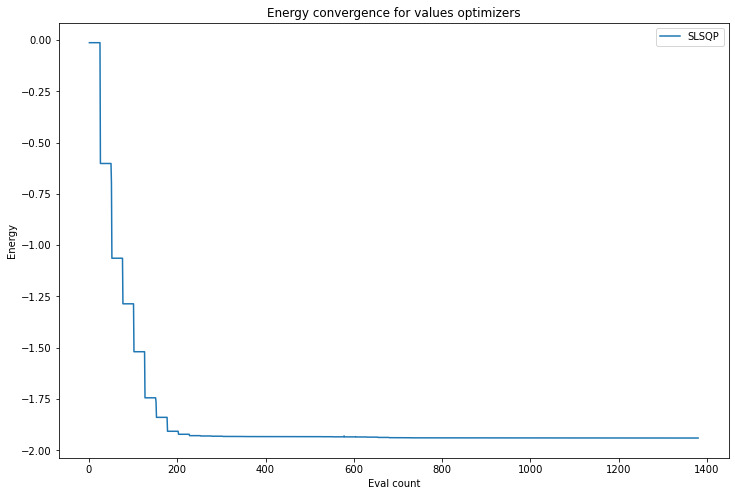

In [11]:
import pylab as pl
pl.rcParams['figure.figsize'] = (12, 8)
pl.plot(counts, values, label='SLSQP')
pl.xlabel('Eval count')
pl.ylabel('Energy')
pl.title('Energy convergence for values optimizers')
pl.legend(loc='upper right')


In [3]:
from scipy.linalg import expm
import numpy.linalg as LA
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.opflow import X, Y, Z, I
def create_hamiltonian(Nq, cn, gamma, Bn):
    '''
    create Hamiltonian gate
    target Hamiltonian is H=1/2*cn((1+gamma)XX+(1-gamma)YY)+BnZn
    Nq -> number of qubit
    cn -> coupling constant
    gamma -> parameter
    Bn -> Magnetic field
    '''
    
    XX= np.array(np.zeros(2**Nq))
    YY= np.array(np.zeros(2**Nq))
    Zn= np.array(np.zeros(2**Nq))
    Identity = 'I' * Nq
    hamiltonian = np.array(np.zeros(2**Nq))
    
    for k in range(0, Nq):
        '''
        隣あうqubitのみ相互作用するようなモデルを考える
        0 1 2 ... k-1 X X k+2 ... N-1
        0 1 2 ... k-1 Y Y k+2 ... N-1
        '''
        
        # 端まで計算したらスキップ
        if k == Nq-1:
            continue

        hamiX = Pauli(Identity[:k] + 'XX' + Identity[k+2:])
        hamiY = Pauli(Identity[:k] + 'YY' + Identity[k+2:])

        XX = XX + 0.5*cn[k]*(1+gamma)*hamiX.to_matrix()
        YY = YY + 0.5*cn[k]*(1-gamma)*hamiY.to_matrix()

    for k in range(0, Nq):
        hamiZ = Pauli(Identity[:k] + 'Z' + Identity[k+1:])
        Zn = Zn + Bn[k] * hamiZ.to_matrix()
    
    return XX + YY + Zn

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from math import pi
def create_ansatz(q,cn,r,bn):
    theta = Parameter('θ')
#     time = Parameter('t')
#     TODO: boundを設定できるか確認
    qc = QuantumCircuit(q)
    qc.cx(0, 1)
    qc.rx(theta,[0,1])
    qc.ry(theta,[0,1])
    hami = expm(-1j*create_hamiltonian(q,cn,r,bn)*1)
    qc.append(Operator(hami),list(range(q)))
    return qc


In [7]:
import numpy as np
from qiskit import BasicAer
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance

qubit = 6
cn = [1] * qubit
r = 0
bn = [0] * qubit

counts = []
values = []
def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

from qiskit.utils import algorithm_globals
seed = 50
algorithm_globals.random_seed = seed
ql = QuantumInstance(BasicAer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)

ansatz = create_ansatz(qubit, cn, r, bn)
opt = SLSQP(maxiter=10000)
vqe = VQE(ansatz=ansatz, optimizer=opt, quantum_instance=ql, callback=store_intermediate_result)
result = vqe.compute_minimum_eigenvalue(BeH2_op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 10,
    'eigenstate': array([-6.11363069e-03+4.99981312e-01j, -2.90514071e-01+3.51064538e-01j,
       -9.71029377e-02+3.52246982e-01j, -3.25893248e-16-3.03731035e-01j,
        1.91669751e-01+2.86018464e-01j, -3.00750440e-01+3.22695169e-16j,
        1.76254878e-16+1.64268750e-01j,  0.00000000e+00+0.00000000e+00j,
        1.76239277e-01-6.69165061e-02j,  1.60278052e-16+1.49378421e-01j,
        1.11159774e-01-1.19270721e-16j,  0.00000000e+00+0.00000000e+00j,
       -3.14161069e-17-2.92796697e-02j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -1.71944513e-02-6.44030142e-02j,  4.94908380e-02-5.31020149e-17j,
       -4.50975366e-17-4.20307004e-02j,  0.00000000e+00+0.00000000e+00j,
       -1.48518032e-02+1.59354884e-17j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        2.74516184e-18+2.55847843e-03

/Users/toshifumi.anan/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


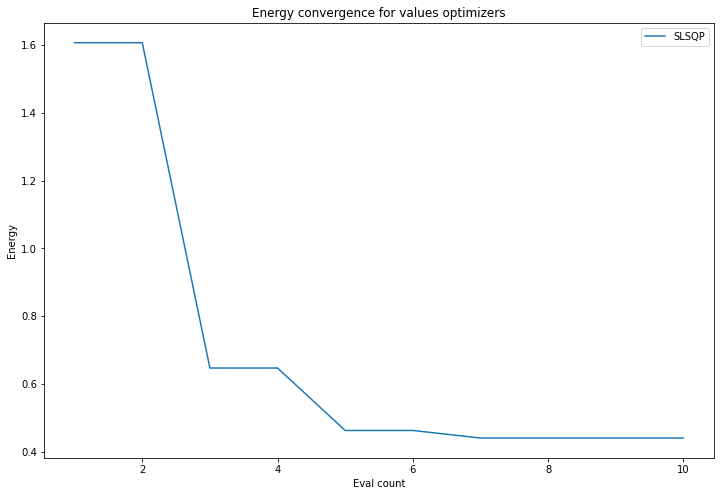

In [8]:
import pylab as pl
pl.rcParams['figure.figsize'] = (12, 8)
pl.plot(counts, values, label='SLSQP')
pl.xlabel('Eval count')
pl.ylabel('Energy')
pl.title('Energy convergence for values optimizers')
pl.legend(loc='upper right')